In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score


In [49]:
data = pd.read_csv("/Users/pratikmishra/Downloads/creditcard.csv")

In [50]:
data = data.sample(frac=0.1,random_state=1)
print(data.shape)
data.head(3)

(28481, 31)


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
169876,119907.0,-0.611712,-0.769705,-0.149759,-0.224877,2.028577,-2.019887,0.292491,-0.523020,0.358468,...,-0.075208,0.045536,0.380739,0.023440,-2.220686,-0.201146,0.066501,0.221180,1.79,0
127467,78340.0,-0.814682,1.319219,1.329415,0.027273,-0.284871,-0.653985,0.321552,0.435975,-0.704298,...,-0.128619,-0.368565,0.090660,0.401147,-0.261034,0.080621,0.162427,0.059456,1.98,0
137900,82382.0,-0.318193,1.118618,0.969864,-0.127052,0.569563,-0.532484,0.706252,-0.064966,-0.463271,...,-0.305402,-0.774704,-0.123884,-0.495687,-0.018148,0.121679,0.249050,0.092516,0.89,0


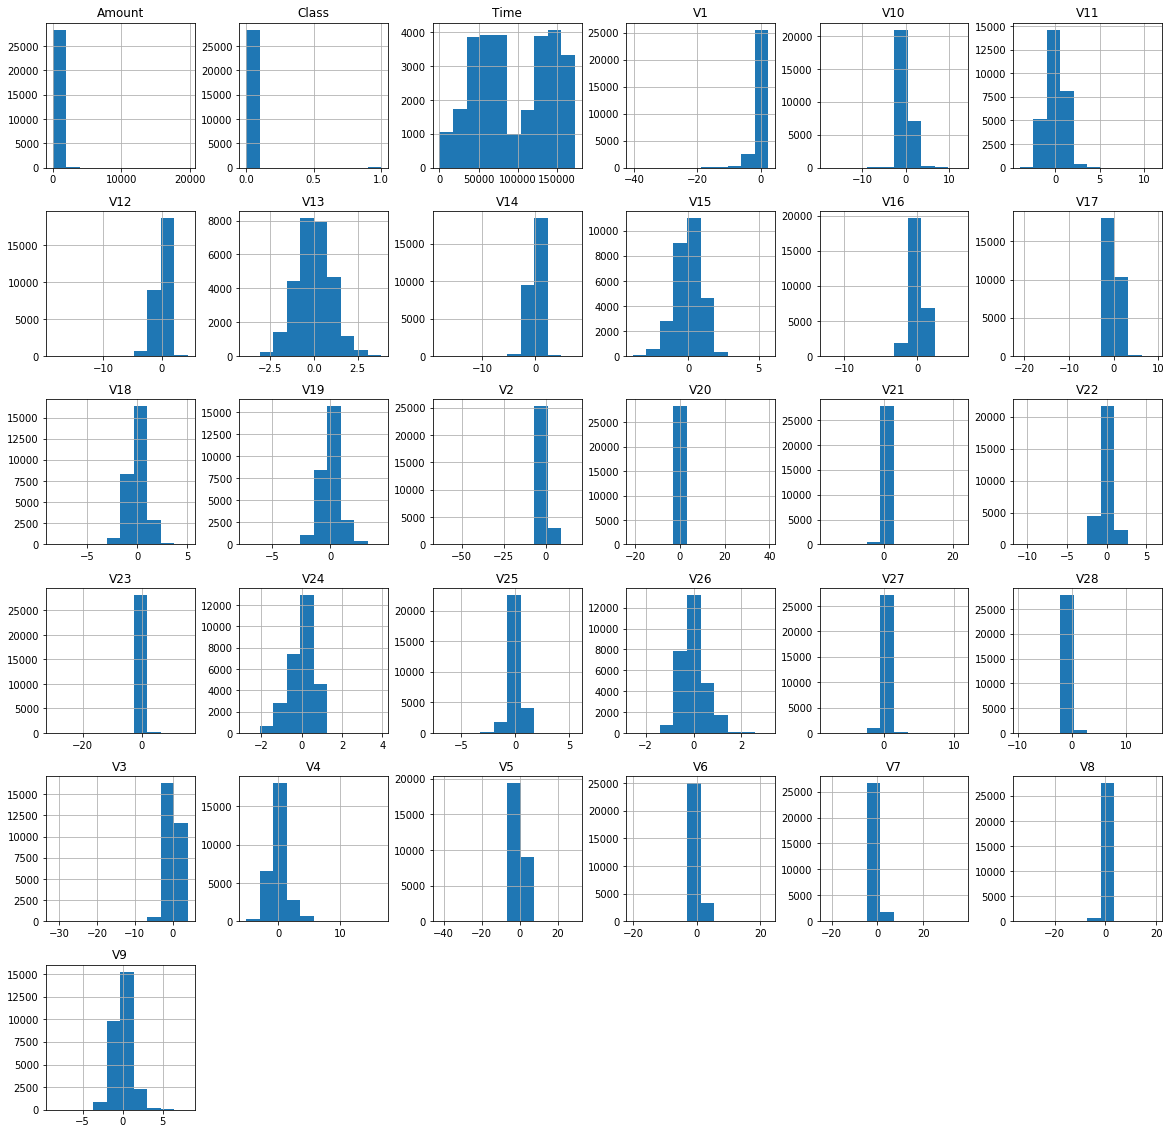

In [51]:
data.hist(figsize=(20,20))
plt.show()

In [52]:
columns = data.columns.tolist()

columns = [c for c in columns if c not in ["Class"]]
target = "Class"
X = data[columns]
Y = data[target]
Fraud = data[data["Class"]==1]
valid = data[data["Class"]==0]
outlier_fraction=len(Fraud)/float(len(valid))

In [53]:
classifiers = {
    "IsolationForest":IsolationForest(max_samples=len(X),
                                     contamination = outlier_fraction,random_state=1),
    "Local Outlier Factor":LocalOutlierFactor(
    n_neighbors=20,
    contamination = outlier_fraction)
}

In [54]:
n_outliers=len(Fraud)

for i,(model_name,model) in enumerate(classifiers.items()):
    
    if model_name=="Local Outlier Factor":
        y_pred = model.fit_predict(X)
        scores_pred = model.negative_outlier_factor_
    else:
        model.fit(X)
        scores_pred=model.decision_function(X)
        y_pred=model.predict(X)
#0 for valid and 1 for Fraud    
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors=(y_pred!=Y).sum()
    
    print("{}: {}".format(model_name,n_errors))
    print(accuracy_score(Y,y_pred))
    print(classification_report(Y,y_pred))


IsolationForest: 71
0.99750711000316
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.28      0.29      0.28        49

    accuracy                           1.00     28481
   macro avg       0.64      0.64      0.64     28481
weighted avg       1.00      1.00      1.00     28481

Local Outlier Factor: 97
0.9965942207085425
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.02      0.02      0.02        49

    accuracy                           1.00     28481
   macro avg       0.51      0.51      0.51     28481
weighted avg       1.00      1.00      1.00     28481



In [55]:
#over sampling imbalanced dataset
sm = SMOTE(sampling_strategy='minority', random_state=7)
x_imbtrain,x_imbtest,y_imbtrain,y_imbtest = train_test_split(X,Y,test_size=0.2)
oversampled_X, oversampled_Y = sm.fit_sample(x_imbtrain,y_imbtrain)

In [56]:
n_outliers=len(Fraud)

for i,(model_name,model) in enumerate(classifiers.items()):
    
    if model_name=="Local Outlier Factor":
        y_pred = model.fit_predict(oversampled_X)
        scores_pred = model.negative_outlier_factor_
    else:
        model.fit(oversampled_X)
        scores_pred=model.decision_function(oversampled_X)
        y_pred=model.predict(oversampled_X)
#0 for valid and 1 for Fraud    
    y_pred[y_pred==1]=0
    y_pred[y_pred==-1]=1
    
    n_errors=(y_pred!=oversampled_Y).sum()
    
    print("{}: {}".format(model_name,n_errors))
    print(accuracy_score(oversampled_Y,y_pred))
    print(classification_report(oversampled_Y,y_pred))

IsolationForest: 22822
0.4982632018643099
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     22743
           1       0.00      0.00      0.00     22743

    accuracy                           0.50     45486
   macro avg       0.25      0.50      0.33     45486
weighted avg       0.25      0.50      0.33     45486

Local Outlier Factor: 22796
0.4988348063140307
              precision    recall  f1-score   support

           0       0.50      1.00      0.67     22743
           1       0.16      0.00      0.00     22743

    accuracy                           0.50     45486
   macro avg       0.33      0.50      0.33     45486
weighted avg       0.33      0.50      0.33     45486



In [57]:

x_train,x_test,y_train,y_test = train_test_split(oversampled_X,oversampled_Y,test_size=0.2)

rf = RandomForestClassifier(n_estimators=100,max_depth=10,random_state=1)
rf.fit(x_train,y_train)
y_predict = rf.predict(x_test)

print(accuracy_score(y_test,y_predict))
print(classification_report(y_test,y_predict))

0.9996702571993845
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4533
           1       1.00      1.00      1.00      4565

    accuracy                           1.00      9098
   macro avg       1.00      1.00      1.00      9098
weighted avg       1.00      1.00      1.00      9098



In [42]:
oversampled_X.shape

(45488, 30)

In [43]:
x_train.shape

(36390, 30)

In [44]:
y_test.shape

(9098,)

In [45]:
p = y_test[y_test==1]
p.shape

(4547,)

In [58]:
#x_tra,x_te,y_tra,y_te = train_test_split(X,Y,test_size=0.2)
y_predictions = rf.predict(x_imbtest)
print(accuracy_score(y_imbtest,y_predictions))
print(classification_report(y_imbtest,y_predictions))

0.9992978760751272
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5689
           1       0.83      0.62      0.71         8

    accuracy                           1.00      5697
   macro avg       0.92      0.81      0.86      5697
weighted avg       1.00      1.00      1.00      5697

